In [1]:
%matplotlib inline

In [17]:
from grid.gmt import GMTGrid
from grid.shake import ShakeGrid
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os.path

The Grid class hierarchy can be used for reading, writing and manipulating various kinds 
of 2D grid formats (GMT grids), or multi-layer 2D grid formats (ShakeMap).

In [18]:
#######MODIFY THIS TO REFLECT THE LOCATION OF A GLOBAL GRID ON YOUR SYSTEM####
vs30grid = os.path.join(os.path.expanduser('~'),'pager','data','global_vs30.grd')
shakemap = os.path.join(os.path.expanduser('~'),'data','shakemaps','northridge.xml')
##############################################################################

The grid classes can be used to get spatial information about the file before opening it. 

In [19]:
fgeodict = ShakeGrid.getFileGeoDict(shakemap)
print fgeodict

NameError: global name 'shakefilename' is not defined

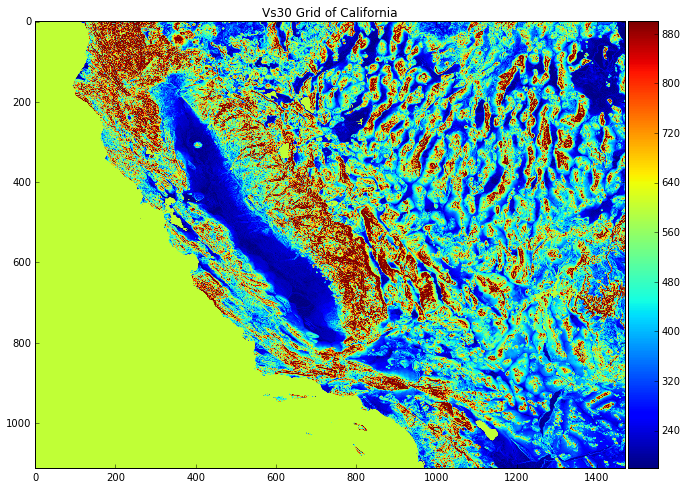

In [16]:
#41.798959,-125.178223 ulcorner of calif
#32.543919,-112.950439 lrcorner of calif
sdict = {'xmin':-125.178223,'xmax':-112.950439,'ymin':32.543919,'ymax':41.798959,'xdim':0.008,'ydim':0.008}
grid = GMTGrid.load(vs30grid,samplegeodict=sdict)
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8));
data = grid.getData();
im = plt.imshow(grid.getData())
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05);
plt.colorbar(im, cax=cax);
ax.set_title('Vs30 Grid of California');

In [5]:
M = 6
N = 4
data = np.arange(0,M*N).reshape(6,4)
data = data.astype(np.int32) #arange gives int64 by default, not supported by netcdf3
xvar = np.arange(0.5,0.5+N,1.0)
yvar = np.arange(0.5,0.5+M,1.0)
geodict = {'nrows':N,
           'ncols':N,
           'xmin':0.5,
           'xmax':xvar[-1],
           'ymin':0.5,
           'ymax':yvar[-1],
           'xdim':1.0,
           'ydim':1.0}
gmtgrid = GMTGrid(data,geodict)
gmtgrid.save('test.grd',format='netcdf')
gmtgrid2 = gmtgrid.load('test.grd')
plt.imshow(gmtgrid2.getData(),interpolation='nearest');
plt.colorbar();
print gmtgrid2.getData()

DataSetException: 'Input geodict does not match shape of input data.'

In [32]:
x = np.arange(100.0); x.shape = 10,10
print x

[[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.]
 [ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.]
 [ 20.  21.  22.  23.  24.  25.  26.  27.  28.  29.]
 [ 30.  31.  32.  33.  34.  35.  36.  37.  38.  39.]
 [ 40.  41.  42.  43.  44.  45.  46.  47.  48.  49.]
 [ 50.  51.  52.  53.  54.  55.  56.  57.  58.  59.]
 [ 60.  61.  62.  63.  64.  65.  66.  67.  68.  69.]
 [ 70.  71.  72.  73.  74.  75.  76.  77.  78.  79.]
 [ 80.  81.  82.  83.  84.  85.  86.  87.  88.  89.]
 [ 90.  91.  92.  93.  94.  95.  96.  97.  98.  99.]]


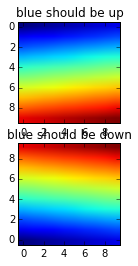

In [35]:
interp = 'bilinear';
plt.subplot(211, axisbg='g')
plt.title('blue should be up')
plt.imshow(x, origin='upper', interpolation=interp)

plt.subplot(212, axisbg='y')
plt.title('blue should be down')
plt.imshow(x, origin='lower', interpolation=interp)